In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Iris.csv',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.shape

(150, 5)

In [7]:
df[df == '?'].sum()

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species            0
dtype: object

In [8]:
df.isnull().sum().sum()

0

In [9]:
df = df.replace('?', np.nan)  # Replace '?' values with NaN
df = df.dropna()  # Remove rows with missing values

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [12]:
le = LabelEncoder()
le.fit(df['Species'])
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df['Species'] = le.transform(df['Species'])

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.shape

(150, 5)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [17]:
# Split the data into training and testing sets
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate features and target variable
X = df.drop(columns=['Species'])  # Assuming 'Species' is the target variable
y = df['Species']

# Convert all non-numeric columns to numeric (if needed)
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Make predictions on the test set using the logistic regression model
y_pred_logreg = logreg.predict(X_test)

In [20]:
# Calculate accuracy for logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

accuracy_logreg

1.0

In [21]:
# Build a Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [22]:
# Make predictions on the test set using the Naïve Bayes model
y_pred_nb = naive_bayes.predict(X_test)

In [23]:
# Calculate accuracy for Naïve Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

1.0

In [24]:
# Compare the accuracies of the two models
print("Accuracy - Logistic Regression:", accuracy_logreg)
print("Accuracy - Naïve Bayes:", accuracy_nb)

Accuracy - Logistic Regression: 1.0
Accuracy - Naïve Bayes: 1.0


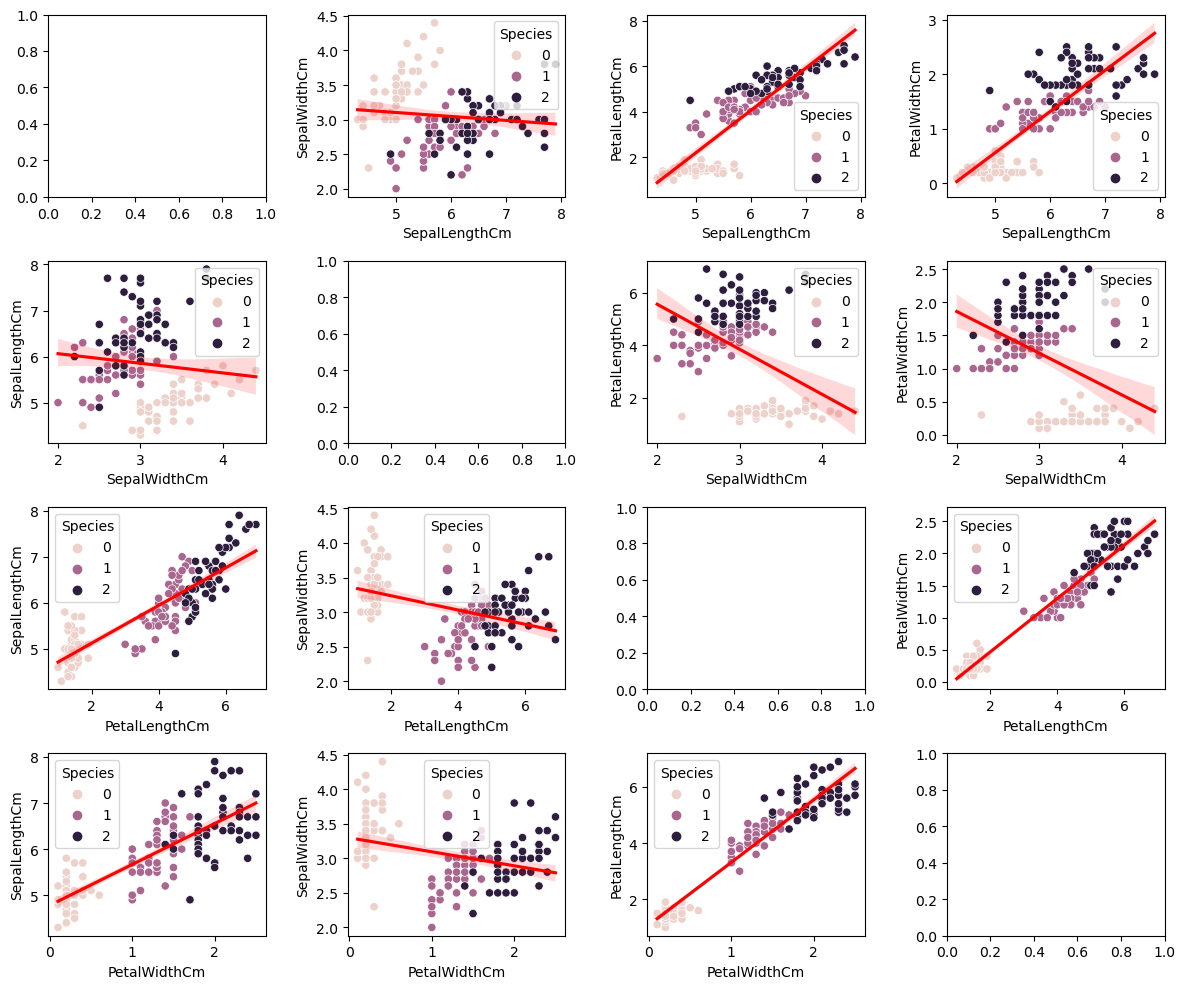

In [25]:
# Plotting linear regression lines for each pair of features
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns
# Assuming 'df' is your DataFrame containing the data
# Convert feature columns to numeric type if they are not already numeric
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 10))
for i, feature1 in enumerate(df.columns[:-1]):
    for j, feature2 in enumerate(df.columns[:-1]):
        plt.subplot(4, 4, i * 4 + j + 1)
        if i != j:
            sns.scatterplot(x=feature1, y=feature2, hue='Species', data=df)
            sns.regplot(x=feature1, y=feature2, data=df, scatter=False, color='red')
plt.tight_layout()
plt.show()


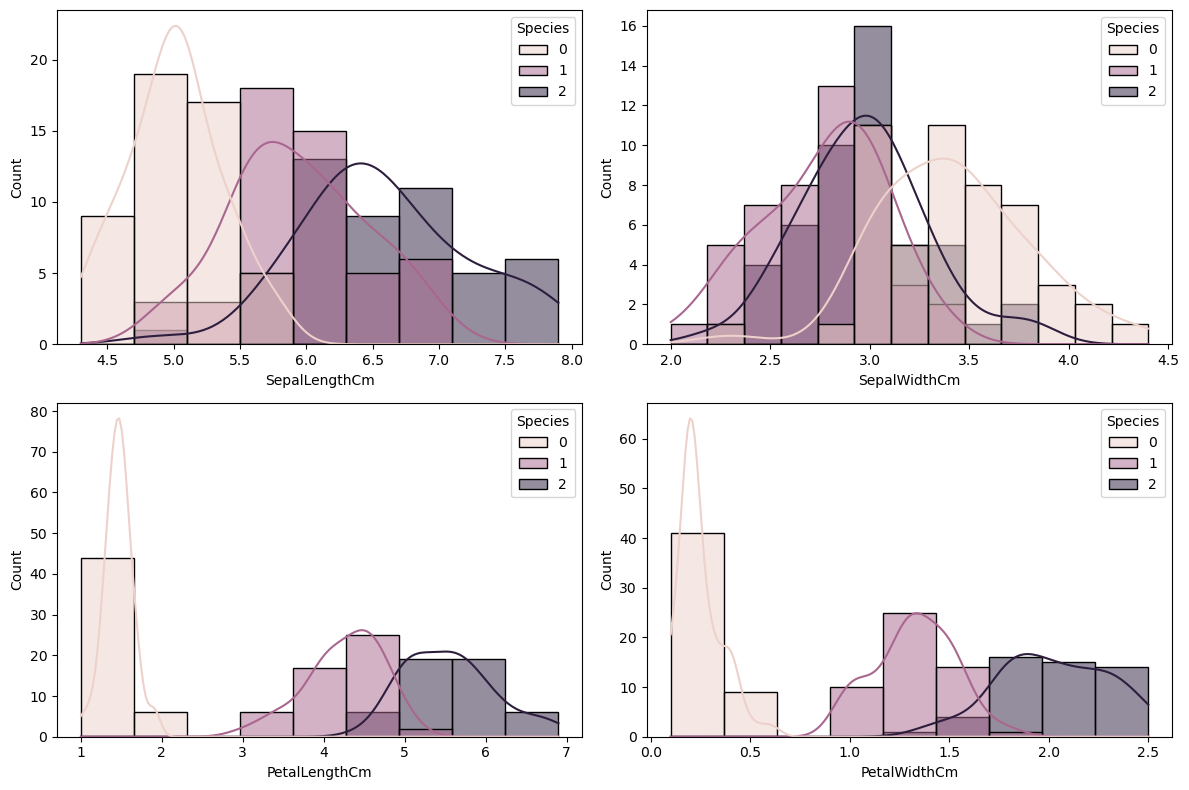

In [26]:
# Plotting histograms for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Species', kde=True)
plt.tight_layout()
plt.show()

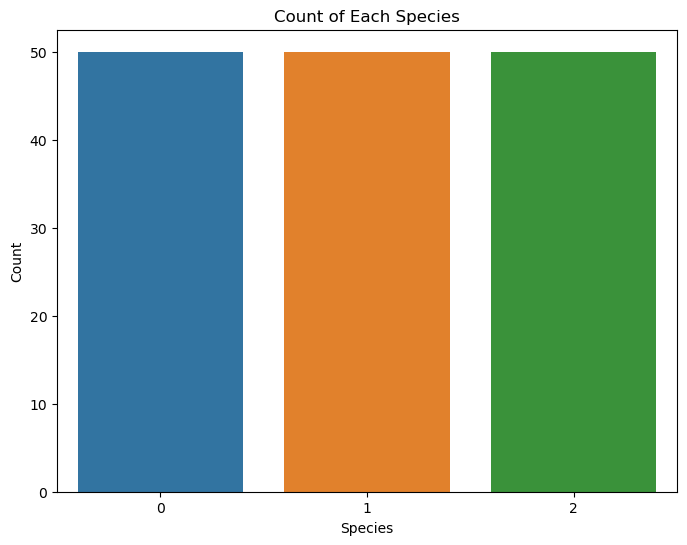

In [27]:
# Bar graph for species count
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

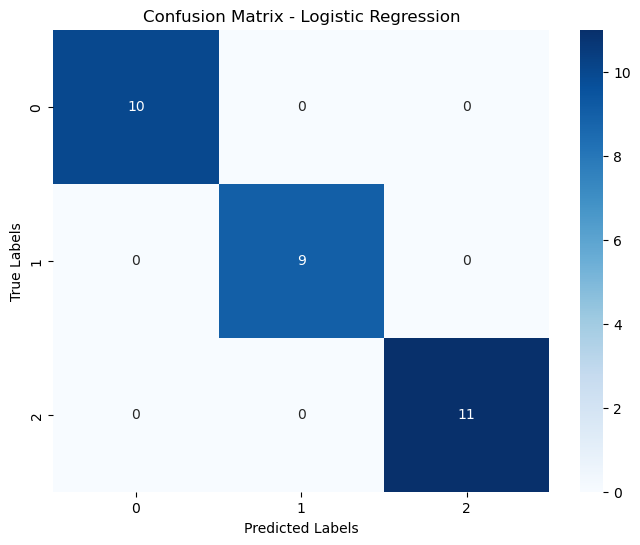

Accuracy - Logistic Regression: 1.0
Accuracy - Naïve Bayes: 1.0


In [28]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print accuracies
print("Accuracy - Logistic Regression:", accuracy_logreg)
print("Accuracy - Naïve Bayes:", accuracy_nb)

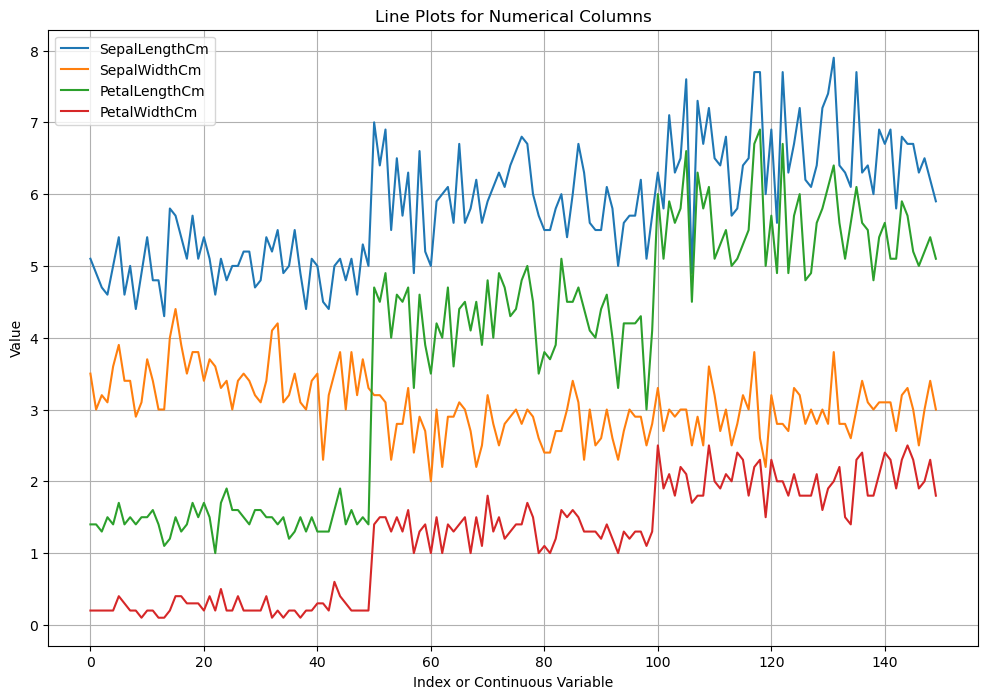

In [29]:
import matplotlib.pyplot as plt

# Line plots for numerical columns
plt.figure(figsize=(12, 8))

# Iterate through each numerical column and plot a line plot
for column in df.columns[:-1]:
    plt.plot(df[column], label=column)

plt.title('Line Plots for Numerical Columns')
plt.xlabel('Index or Continuous Variable')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

